# Lab 6: Image Filtering in Frequency Domain - DFT


### 1. **Discrete Fourier Transform (DFT)**
The **Discrete Fourier Transform (DFT)** is used to convert a spatial domain image into the frequency domain. In the frequency domain, an image is represented by sinusoidal components, which makes it easier to analyze certain patterns such as edges and textures.

The 2D DFT of an image \( f(x, y) \) is given by:

$$
F(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) \cdot e^{-j 2\pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$

Where:
- \( f(x, y) \) is the image in spatial domain,
- \( F(u, v) \) is the frequency domain representation,
- \( j \) is the imaginary unit (\( j = \sqrt{-1} \)),
- \( M \) and \( N \) are the dimensions of the image.

### 2. **Magnitude Spectrum**
The DFT result contains both real and imaginary components. The **magnitude spectrum** represents the strength of the frequencies. The magnitude of each frequency component \( |F(u, v)| \) is calculated as:

$$
|F(u, v)| = \sqrt{R(u, v)^2 + I(u, v)^2}
$$

Where:
- \( R(u, v) \) is the real part of the frequency,
- \( I(u, v) \) is the imaginary part of the frequency.

This magnitude spectrum helps us visualize the strength of different frequency components in the image, such as edges, textures, and other patterns.

### 3. **Logarithmic Transformation**
The raw magnitude values obtained from the DFT can have a large dynamic range, making it difficult to visualize in a human-friendly manner. To enhance the visibility of the low and high frequencies, we use a logarithmic transformation:

$$
\text{Magnitude Spectrum (Log Transformed)} = 20 \cdot \log_{10}(|F(u, v)| + 1)
$$

This transformation helps in compressing large values and making smaller values more visible.

### 4. **FFT Shift**
After computing the DFT, the zero-frequency component (DC component) is usually located at the top-left corner of the image. For better visualization, we shift the zero-frequency component to the center of the image using the FFT shift operation. This is done by:

$$
\text{Shifted DFT} = \text{fftshift}(F(u, v))
$$

This operation moves the low-frequency components to the center, which is a standard practice for visualization and analysis of the frequency domain.

### 5. **Image Filtering in Frequency Domain**
In the frequency domain, we can apply various filters like **low-pass filters**, **high-pass filters**, etc., to modify or enhance certain frequencies. For example:
- **Low-pass filters** pass low frequencies (smooth components) and block high frequencies (edges).
- **High-pass filters** block low frequencies and pass high frequencies (edges).

Filters are typically applied by multiplying the frequency domain image by a mask, which alters the frequency components based on the filter's properties.



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

img = cv2.imread('Lenna_fourierinput.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not found. Check the filename!")


rows, cols = img.shape
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)


padded = cv2.copyMakeBorder(img, 0, nrows - rows, 0, ncols - cols, cv2.BORDER_CONSTANT, value=0)


In [3]:
dft = cv2.dft(np.float32(padded), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  


magnitude = cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])
magnitude_spectrum = 20 * np.log(magnitude + 1)  


In [4]:
mask = np.zeros((nrows, ncols, 2), np.uint8)
center_row, center_col = nrows // 2, ncols // 2
radius = 30

for i in range(nrows):
    for j in range(ncols):
        if np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2) <= radius:
            mask[i, j] = 1 


fshift = dft_shift * mask


f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])


In [5]:
mask_hp = np.ones((nrows, ncols, 2), np.uint8)
mask_hp[mask == 1] = 0  


fshift_hp = dft_shift * mask_hp

f_ishift_hp = np.fft.ifftshift(fshift_hp)
img_back_hp = cv2.idft(f_ishift_hp)
img_back_hp = cv2.magnitude(img_back_hp[:,:,0], img_back_hp[:,:,1])


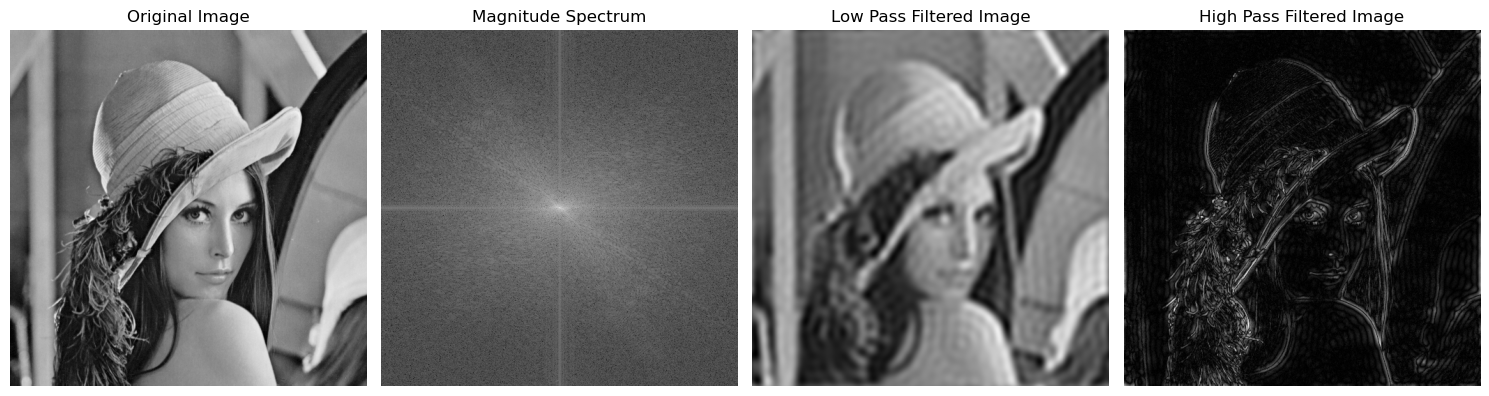

In [ ]:
plt.figure(figsize=(15, 6))


plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 4, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')


plt.subplot(1, 4, 3)
plt.imshow(img_back, cmap='gray')
plt.title("Low Pass Filtered Image")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_back_hp, cmap='gray')
plt.title("High Pass Filtered Image")
plt.axis('off')

plt.tight_layout()
plt.show()
